In [9]:
from yahooquery import Ticker
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

view test ticker data to compare\
info about Ticker object found here:\
https://yahooquery.dpguthrie.com/guide/ticker/historical/

In [2]:
tickers = Ticker('spy', asynchronous=True)

df = tickers.history('5y')
df.head()

close         low        open        high    volume  \
symbol date                                                                   
spy    2017-06-19  244.660004  243.479996  243.589996  244.729996  65123800   
       2017-06-20  243.009995  242.990005  244.250000  244.259995  56906400   
       2017-06-21  242.949997  242.410004  243.460007  243.589996  55977600   
       2017-06-22  242.839996  242.639999  242.960007  243.529999  44148100   
       2017-06-23  243.130005  242.470001  242.910004  243.509995  66986800   

                     adjclose  dividends  
symbol date                               
spy    2017-06-19  224.323380        0.0  
       2017-06-20  222.810516        0.0  
       2017-06-21  222.755478        0.0  
       2017-06-22  222.654617        0.0  
       2017-06-23  222.920563        0.0

<AxesSubplot:xlabel='date', ylabel='close'>

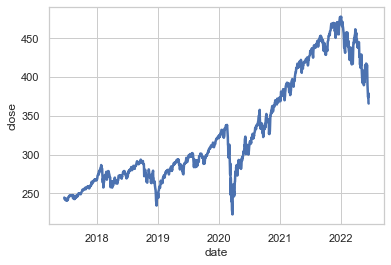

In [3]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=df.close.spy, palette="tab10", linewidth=2.5)

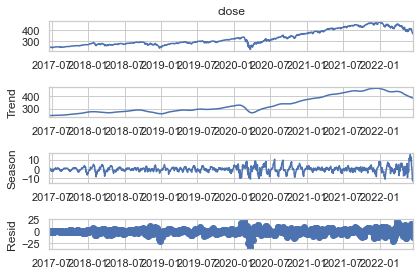

In [11]:
stl = STL(df.close.spy, period=30, seasonal=7)
res = stl.fit()
fig = res.plot()

decompose data for parameters

c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

<AxesSubplot:>

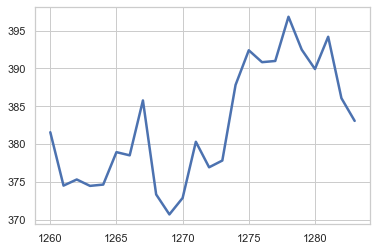

In [12]:
stlf = STLForecast(df.close.spy, ARIMA, model_kwargs=dict(order=(1, 1, 1), trend="t"), period=30)
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
sns.lineplot(data=forecast, palette="tab10", linewidth=2.5)

In [13]:
model = ARIMA(df.close.spy, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rick.gray\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1260
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3539.952
Date:                Mon, 20 Jun 2022   AIC                           7085.903
Time:                        18:19:43   BIC                           7101.318
Sample:                             0   HQIC                          7091.696
                               - 1260                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4207      0.083     -5.050      0.000      -0.584      -0.257
ma.L1          0.2993      0.089      3.376      0.001       0.126       0.473
sigma2        16.2094      0.317     51.150      0.0